# Python for data analysis TP 5 






### 1) Machine Learning ?

Machine Learning algorithms are an application of artificial intelligence (AI) that automatically build a mathematical model using sample data – also known as “training data” – to make decisions without being specifically programmed to make those decisions.



### 2) Supervised

On donne à la machine un lot d'exemples labelisés. La machine doit trouver une loi permettant de déduire l'output à partir des inputs.

Classification  ( outputs discrets)
- Spam / no spam ?
- malade / pas malade ?
- 1/2/3/4/5/6/7/8 ou 9 ?
- cliquera / cliquera pas ?

Mais aussi Regression (outputs continus)

- Valeur d'une maison en fonction de sa surface ?
- Nb de nouveaux cas covid en fonction de la température ?



Entraîner (faire apprendre) un modèle de régression c’est faire du ML. 

"Le ML peut être vu comme l’ensemble des méthodes permettant de déterminer la meilleure manière de modéliser les données. Parmi ces méthodes, la plus centrale et la plus importante est l’apprentissage. L’apprentissage consiste, pour un modèle donné, à choisir les meilleurs paramètres possibles pour décrire les données. Pour une régression simple, avec une droite y=ax+b, il s’agit de choisir le meilleur couple a, b. Dans ce cas, la connaissance acquise par l’expérience (les différents échantillons de données sont autant de micro-expériences), est stockée dans ces deux coefficients a et b. Un modèle plus complexe stocke sa connaissance dans un nombre beaucoup plus grand de coefficients pouvant dépasser le million voire le milliard (pour les réseaux de neurones complexes par exemple), mais le principe est le même : le ML permet à une machine (le modèle, simple ou complexe) d’apprendre et de stocker sa compréhension du monde."

( https://www.quantmetry.com/blog/une-petite-histoire-du-machine-learning/ ) 



### 3) Unsupervised

On ne fournit aucun label à l'algorithme. Il doit découvrir sans assitance les structures caractéristiques dans les données. 
Clustering : on transmet un lot d'images représentant tous types d'objet, l'algorithme doit repérer la répétition d'objets similaires et trier les images en fonction: immeubles, chiens, arbres, voitures. Bien sur il ne connaitra pas le nom des objets qu'il identifie, mais il comprendra qu'ils sont similaires et pourra leur donner le meme label.




Reinforcement learning : 
L'algo qui a appris de façon supervisée est capable de se renforcer en jouant ( alphago), ou 100% RL pour la dernière version.
L'algo se renforce en recevant une récompense, positive ou négative: alphago , robots boston dynamics : récompense forte si il reste debout, négative quand il tombe. Il explore lui même les différents mouvements et en déduit les meilleurs, ceux qui lui permettent de rester debout.



### 3)  The stages of a model's life


- 1. Collecte des données
- 2. Analyse descriptive pour comprendre les données
- 3. Transformation si besoin ( bucketisation, simplification, centrage..)
- 4. Division en training set et testing set
- 5. Choix Modèle
- 6. Training à partir du training set  <------
- 7. Evaluation sur test set                  |
- 8. Modification des Hyper-paramètres --------
- 9. Utilisation / mise en production




### 3) Many available ML Algorithms : 

- Support Vector Machines
- Linear Regression
- Logistic Regression (with threshold)
- Catboost
- Random forest
- Classification trees
- boosting
- k-nearest neighbors
- Naive Bayes
...

more details here : https://www.dataquest.io/blog/top-10-machine-learning-algorithms-for-beginners/

pour les maths afférentes à ces modèles : https://stanford.edu/~shervine/l/fr/teaching/cs-229/pense-bete-apprentissage-supervise


### 4)  Evaluation des résultats

We need some evaluation methods to be able to determine if our trained model is doing a good job.

The simplest metric that comes to mind is Accuracy : total number of good guess / 100 examples

This method can be sufficient in many cases, but not all.
Imagine a situation where you have in real life 99,9% negative and 0,1 positive, but you want to be confident in model that will detect this 0,1 positive. Training a model with an accuracy of 99,9 % will not do the job ! 
for instance : tumor detection. you want to minimize false negatives.

You need other validation metrics 


Model evaluation methods : 

https://stanford.edu/~shervine/l/fr/teaching/cs-229/pense-bete-machine-learning-petites-astuces

Classification Matrix : accuracy(% good guesses), precision (% of positive predicton that were true), recall (TPR) , specificy (TNR)
ROC ( TP / FP for all thresholds)
Area under roc = probability a random positive example will get a higher score than a random negative example

( slides google ML)


Model Pitfalls
(https://towardsdatascience.com/machine-learning-pitfalls-e54ac3edc25)

- Correlation is not Causation
Spurious correlation : shark attacks and ice cream. 
pointure et niveau en maths chez les collégiens.
Cum hoc ergo propter hoc



- Underfitting / Overfitting

- Unrepresentative dataset








( standard scaler : https://towardsdatascience.com/how-and-why-to-standardize-your-data-996926c2c832 ) 


### 5) THE SCIKIT LEARN WAY


"Scikit-Learn is characterized by a clean, uniform, and streamlined API, as well as by very useful and complete online documentation. A benefit of this uniformity is that once you understand the basic use and syntax of Scikit-Learn for one type of model, switching to a new model or algorithm is very straightforward."


Scikit-learn provides dozens of built-in machine learning algorithms and models, called estimators. Each estimator can be fitted to some data using its fit method.

( https://scikit-learn.org/stable/getting_started.html )




### 5.1) Simple Classification using RandomForest algorithm

Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks that **operate by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean/average prediction (regression) of the individual trees**.[1][2] Random decision forests correct for decision trees' habit of overfitting to their training set.[3]:587–588 Random forests generally outperform decision trees, but their accuracy is lower than gradient boosted trees. However, data characteristics can affect their performance.


Random forests are frequently used as "blackbox" models in businesses, as they generate reasonable predictions across a wide range of data while requiring little configuration in packages such as scikit-learn.

In [81]:
# Model Choice , Model Import
from sklearn.ensemble import RandomForestClassifier

# model (classifier) instanciation, tuning hyper parameters
# This algorithm need some random numbers to start

# since we're giving a fixed random_state, the classifier should behave the same every time
clf = RandomForestClassifier(random_state=0) 


# Creation of the features matrix : 1 sample / line, 1 variable/feature /column
X = [[ 1,  2,  3], [11, 12, 13]]  # 2 samples, 3 features

# The samples (i.e., rows) always refer to the individual objects described by the dataset.
# a flower, an email, an image, a person..

X


[[1, 2, 3], [11, 12, 13]]

In [82]:
# Creation of the target array  : one label/class / line
# The array must contains the same nb of lines as the features matrix
y = [0, 1]  # classes of each sample

# Fit the model to your data ( training)
clf.fit(X, y)

RandomForestClassifier(random_state=0)

In [83]:
# now that the model is trained, we can use it to make predictions on unseen data :

clf.predict(X)  # predict classes of the training data

array([0, 1])

In [84]:
clf.predict([[4, 5, 12], [14, 15, 16]])

array([0, 1])

In [85]:
clf.predict([[1, 7, 10]]) 

array([0])

In [ ]:
# Standardization
# Standardization of a dataset is a common requirement for many machine learning estimators: they might behave badly if the individual features do not more or less look like standard normally distributed data (e.g. Gaussian with 0 mean and unit variance). For instance many elements used in the objective function of a learning algorithm (such as the RBF kernel of SVM or the L1 and L2 regularizers of linear models) assume that all features are centered around 0 and have variance in the same order. – seralouk May 17 at 10:18 
# So, Standardization leads to a) more stable b) less influenced by the range of variables c) faster fitting d) more stable performance
# from https://stackoverflow.com/questions/40758562/can-anyone-explain-me-standardscaler#:~:text=The%20idea%20behind%20StandardScaler%20is,each%20column%20of%20the%20data).

### 5.2) Simple linear regression

In [1]:
import matplotlib.pyplot as plt
import numpy as np

rng = np.random.RandomState(46)

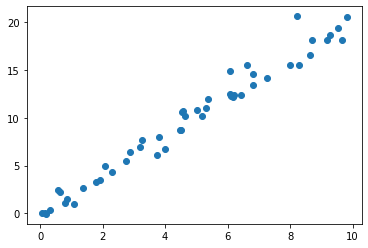

In [5]:
x = 10 * rng.rand(50)
y = 2 * x + rng.randn(50)
plt.scatter(x, y);

In [10]:
# Model Choice , Model Import
from sklearn.linear_model import LinearRegression

# model instanciation, tuning hyper parameters
model = LinearRegression(fit_intercept=True)
model

LinearRegression()

In [11]:
print(np.newaxis)

None


In [12]:
# we need to modify x to make it a matrix of size [n_samples, n_features]. 
X = x[:, np.newaxis]
#  numpy.newaxis is used to increase the dimension of the existing array by one more dimension
X.shape

(50, 1)

In [13]:
# Fit the model to your data
model.fit(X, y)

LinearRegression()

In [14]:
# NOW THE MODEL IS TRAINED
# In Scikit-Learn, by convention all model parameters that were learned during the fit() process have trailing underscores; 
# for example in this linear model, we have the following:

In [15]:
model.coef_

array([2.04726026])

In [16]:
model.intercept_

0.033457978922584175

In [18]:
# now that the model is trained, we can use it to make predictions on unseen data.
# let's generate some data : 
xfit = np.linspace(-1, 11)

# as before, we need to adapt the data to give the model a 2d matrix [n_samples, n_features] : 
Xfit = xfit[:, np.newaxis]

Xfit



array([[-1.        ],
       [-0.75510204],
       [-0.51020408],
       [-0.26530612],
       [-0.02040816],
       [ 0.2244898 ],
       [ 0.46938776],
       [ 0.71428571],
       [ 0.95918367],
       [ 1.20408163],
       [ 1.44897959],
       [ 1.69387755],
       [ 1.93877551],
       [ 2.18367347],
       [ 2.42857143],
       [ 2.67346939],
       [ 2.91836735],
       [ 3.16326531],
       [ 3.40816327],
       [ 3.65306122],
       [ 3.89795918],
       [ 4.14285714],
       [ 4.3877551 ],
       [ 4.63265306],
       [ 4.87755102],
       [ 5.12244898],
       [ 5.36734694],
       [ 5.6122449 ],
       [ 5.85714286],
       [ 6.10204082],
       [ 6.34693878],
       [ 6.59183673],
       [ 6.83673469],
       [ 7.08163265],
       [ 7.32653061],
       [ 7.57142857],
       [ 7.81632653],
       [ 8.06122449],
       [ 8.30612245],
       [ 8.55102041],
       [ 8.79591837],
       [ 9.04081633],
       [ 9.28571429],
       [ 9.53061224],
       [ 9.7755102 ],
       [10

In [19]:
# let's feed the data to the model and store his predictions into a new array
yfit = model.predict(Xfit)
yfit

array([-2.01380228e+00, -1.51243242e+00, -1.01106256e+00, -5.09692703e-01,
       -8.32284274e-03,  4.93047017e-01,  9.94416877e-01,  1.49578674e+00,
        1.99715660e+00,  2.49852646e+00,  2.99989632e+00,  3.50126618e+00,
        4.00263604e+00,  4.50400590e+00,  5.00537576e+00,  5.50674562e+00,
        6.00811548e+00,  6.50948534e+00,  7.01085520e+00,  7.51222506e+00,
        8.01359492e+00,  8.51496478e+00,  9.01633464e+00,  9.51770450e+00,
        1.00190744e+01,  1.05204442e+01,  1.10218141e+01,  1.15231839e+01,
        1.20245538e+01,  1.25259237e+01,  1.30272935e+01,  1.35286634e+01,
        1.40300332e+01,  1.45314031e+01,  1.50327730e+01,  1.55341428e+01,
        1.60355127e+01,  1.65368825e+01,  1.70382524e+01,  1.75396223e+01,
        1.80409921e+01,  1.85423620e+01,  1.90437318e+01,  1.95451017e+01,
        2.00464716e+01,  2.05478414e+01,  2.10492113e+01,  2.15505811e+01,
        2.20519510e+01,  2.25533209e+01])

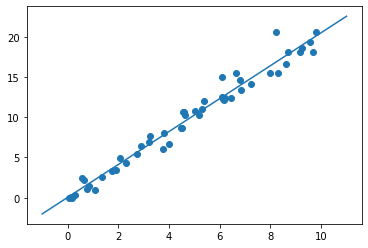

In [21]:
plt.scatter(x, y)
plt.plot(xfit, yfit);

### 5.3) Simple classification using sklearn builtin datasets, and naive Bayes model

given a model trained on a portion of a dataset of labeled samples, how well can we predict the remaining labels?

scikit learn have built in datasets, let's use one for this example : 

In [24]:
from sklearn.datasets import load_iris
iris = load_iris()


In [25]:
type(iris)

sklearn.utils.Bunch

In [26]:
dir(iris) # show all attributes of an object

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [110]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

Class Correlation above is Pearson's correlation coefficient. It shows linear relationship between a feature and classes.

https://stackoverflow.com/questions/52905164/class-correlation-and-its-effects

In [111]:
type(iris.data)

numpy.ndarray

In [112]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [113]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [114]:
iris.data.shape[0],iris.target.shape[0] # same nb of lines

(150, 150)

iris.data and iris.target numpy arrays have the same number of lines.

data is the **feature matrix** (or samples matrix) , target is the 1D **target array** (or target vector / values / classes)

data contains **samples**, target contains the **labels** that have been associated to these samples.

it is mandatory to feed the model with a features matrix and a target array that have the same nb of lines.


In [115]:
list(iris.target_names)

['setosa', 'versicolor', 'virginica']

In [116]:
list(iris.feature_names)

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [118]:
# scikit learns accepts array-like data :  numpy arrays, lists of numbers, pandas DataFrames with all columns numeric, numeric pandas.Series ..
# let's use pandas dataframe to present the data

import pandas as pd
df           = pd.DataFrame(iris['data'])
df.columns   = iris['feature_names']
df['target'] = iris['target']
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [119]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [120]:
X=iris.data # X is standard name for features matrix
y=iris.target # y is standard name for target array


In [144]:
# We would like to split our data into training set and testing set
# training set will be feed to the model, with labels, for training

# testing set will be used for testing, after the model have been trained
# we will ask the model to predict labels on the testing samples, and will compare it to the testing labels
# for this we need to split the dataset into training set and testing set
# we could do this by hand, but scikt learn gives us a useful function to do it 
# default size of test set is 25% of original data

from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=1)

Xtrain.shape, Xtest.shape


((112, 4), (38, 4))

In [154]:
# quelle est la proportion test set / dataset initial par défaut ?
print (f"{Xtest.shape[0]/( Xtrain.shape[0] +Xtest.shape[0] )*100:.2f}")

25.33


In [134]:
# let's use an extremely simple generative model known as Gaussian naive Bayes
# Because it is so fast and has no hyperparameters to choose, 
# Gaussian naive Bayes is often a good model to use as a baseline classification, 
# before exploring whether improvements can be found through more sophisticated models.


In [135]:
from sklearn.naive_bayes import GaussianNB # 1. choose model class
model = GaussianNB()                       # 2. instantiate model
model.fit(Xtrain, ytrain)                  # 3. fit model to data
y_model = model.predict(Xtest)             # 4. predict on new data

In [136]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.9736842105263158

In [ ]:
# Accuracy ?
# nb of good predictions / nb of testing samples
# 97% is a very good score !

### 5.4) Fast correlation matrix on the boston dataset

In [29]:
import pandas as pd # conventional alias
from sklearn.datasets import load_boston

boston = load_boston()
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['target'] = dataset.target

NameError: name 'dataset' is not defined

In [30]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [31]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [32]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [33]:
corr=df.corr(method='kendall')
corr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.462057,0.521014,0.033948,0.603361,-0.211718,0.497297,-0.539878,0.563969,0.544956,0.312768,-0.264378,0.454837
ZN,-0.462057,1.000000,-0.535468,-0.039419,-0.511464,0.278134,-0.429389,0.478524,-0.234663,-0.289911,-0.361607,0.128177,-0.386818
INDUS,0.521014,-0.535468,1.000000,0.075889,0.612030,-0.291318,0.489070,-0.565137,0.353967,0.483228,0.336612,-0.192017,0.465980
CHAS,0.033948,-0.039419,0.075889,1.000000,0.056387,0.048080,0.055616,-0.065619,0.021739,-0.037655,-0.115694,-0.033277,-0.041344
NOX,0.603361,-0.511464,0.612030,0.056387,1.000000,-0.215633,0.589608,-0.683930,0.434828,0.453258,0.278678,-0.202430,0.452005
RM,-0.211718,0.278134,-0.291318,0.048080,-0.215633,1.000000,-0.187611,0.179801,-0.076569,-0.190532,-0.223194,0.032951,-0.468231
AGE,0.497297,-0.429389,0.489070,0.055616,0.589608,-0.187611,1.000000,-0.609836,0.306201,0.360311,0.251857,-0.154056,0.485359
DIS,-0.539878,0.478524,-0.565137,-0.065619,-0.683930,0.179801,-0.609836,1.000000,-0.361892,-0.381988,-0.223486,0.168631,-0.409347
RAD,0.563969,-0.234663,0.353967,0.021739,0.434828,-0.076569,0.306201,-0.361892,1.000000,0.558107,0.251913,-0.214364,0.287943
TAX,0.544956,-0.289911,0.483228,-0.037655,0.453258,-0.190532,0.360311,-0.381988,0.558107,1.000000,0.287769,-0.241606,0.384191


In [34]:
np.ones_like(corr, dtype=bool)

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True],
       [ True,  True,  True,

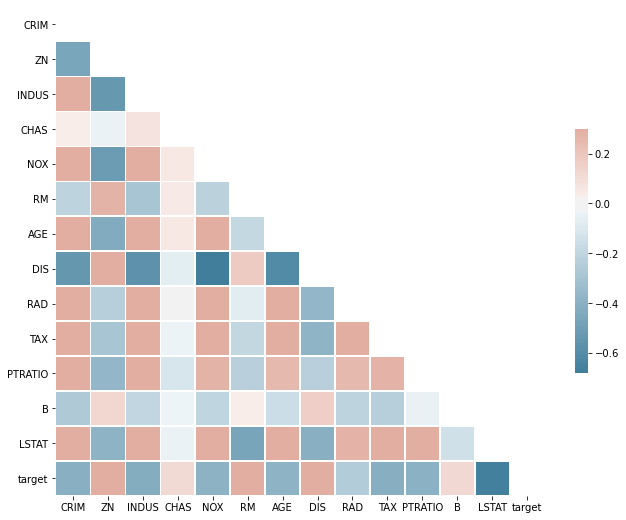

In [123]:
import matplotlib.pyplot as plt
import seaborn # just a conventional alias, don't know why
import numpy as np
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))


# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Generate a custom diverging colormap
cmap = seaborn.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
seaborn.heatmap(corr, mask=mask,cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

(more visualization : http://www.neural.cz/dataset-exploration-boston-house-pricing.html)

### 5.5) Hyperparameters, Model Validation and Testing set

https://jakevdp.github.io/PythonDataScienceHandbook/05.03-hyperparameters-and-model-validation.html



In [35]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

# we choose a model and hyperparameters. 
# Here we'll use a k-neighbors classifier with n_neighbors=1. 
# This is a very simple and intuitive model that says 
# "the label of an unknown point is the same as the label of its closest training point:"

from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=1)

# n_neighbors is the hyperparameter

model.fit(X, y)
y_model = model.predict(X)

from sklearn.metrics import accuracy_score
accuracy_score(y, y_model)

1.0

**100% ?? Really ?**

Yes but.. We gave all our samples to train the model. We know that the model is perfectly trained on our sample data but.. we have no idea how it will behave on new data !

1. You should never train and validate the model using the same data. As we did before, we must split the data into distinct training set and test set, so we will be able to test our model on unseen data.

2. "Furthermore, the nearest neighbor model is an instance-based estimator that simply stores the training data, and predicts labels by comparing new data to these stored points: except in contrived cases, it will get 100% accuracy every time!"
(Jake VanderPlas)

In [36]:
from sklearn.model_selection import train_test_split

# split the data with 50% in each set
X1, X2, y1, y2 = train_test_split(X, y, random_state=0, train_size=0.4)


# fit the model on one set of data
model.fit(X1, y1)

# evaluate the model on the second set of data
y2_model = model.predict(X2)
accuracy_score(y2, y2_model)

0.9222222222222223

In [37]:
model.score(X2,y2)

0.9222222222222223

In [38]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, cv=4)
scores

array([0.97368421, 0.92105263, 0.94594595, 1.        ])

In [39]:
# By default, the score computed at each CV iteration is the score method of the estimator. It is possible to change this by using the scoring parameter:

In [ ]:
# try with different values of training set size

### 5.6) Over-Fitting, Cross Validation

( https://scikit-learn.org/stable/modules/cross_validation.html )

The situation we were in, when we train the model on 100% of the dataset is called **Overfitting**

overfitting is caused by making a model more complex than necessary. The fundamental tension of machine learning is between fitting our data well, but also fitting the data as simply as possible.

(Ockham's razor)


![title](overfitting.png)

We can also overfit when we train too much our model for our training set, by making more iterations for instance.

![title](overfitting_error.webp)

Until now we didn't had to tune our models before training.
Hyper-parameters are parameters that are not directly learnt within estimators. In scikit-learn they are passed as arguments to the constructor of the estimator classes. Typical examples include C, kernel and gamma for Support Vector Classifier, alpha for Lasso, etc.

In machine learning, a hyperparameter is a parameter whose value is used to control the learning process. By contrast, the values of other parameters (typically node weights) are derived via training.

https://en.wikipedia.org/wiki/Hyperparameter_(machine_learning)

Model Hyperparameter tuning is very useful to enhance the performance of a machine learning model. We have discussed both the approaches to do the tuning that is GridSearchCV and RandomizedSeachCV. The only difference between both the approaches is in grid search we define the combinations and do training of the model whereas in RandomizedSearchCV the model selects the combinations randomly. Both are very effective ways of tuning the parameters that increase the model generalizability. 


### 5.4) Working with images

## Pour aller plus loin

Le ML est un sujet très riche. N'hésitez pas à accumuler les explications pour renforcer vos connaissances.

Je vous conseille de suivre les livres / cours / tutos suivants :

- Google ML crash course
- Kaggle intro to machine learning
- Chapitre 5 de Python for datascience Handbook de Jake VanderPlas

## SOURCES USED IN THIS NOTEBOOK

- Romain jouin pdf and notebooks
- jakevdp oreilly book
- scikit-learn getting started
- and Stackoverflow... as always.
